Clustering espectral completado.
Cluster 0: Centroid coordinates - [  0.54969065 246.93542277 289.26871074]
Cluster 1: Centroid coordinates - [  2.106855 116.906    140.8125  ]
Cluster 2: Centroid coordinates - [  0.84591776 337.28647639 398.90075536]
Cluster 3: Centroid coordinates - [  0.37209538 151.00241698 204.52196387]
Cluster 4: Centroid coordinates - [  0.15344792 105.53185577 135.68989423]
Cluster 5: Centroid coordinates - [  0.9275506 496.9       621.4      ]


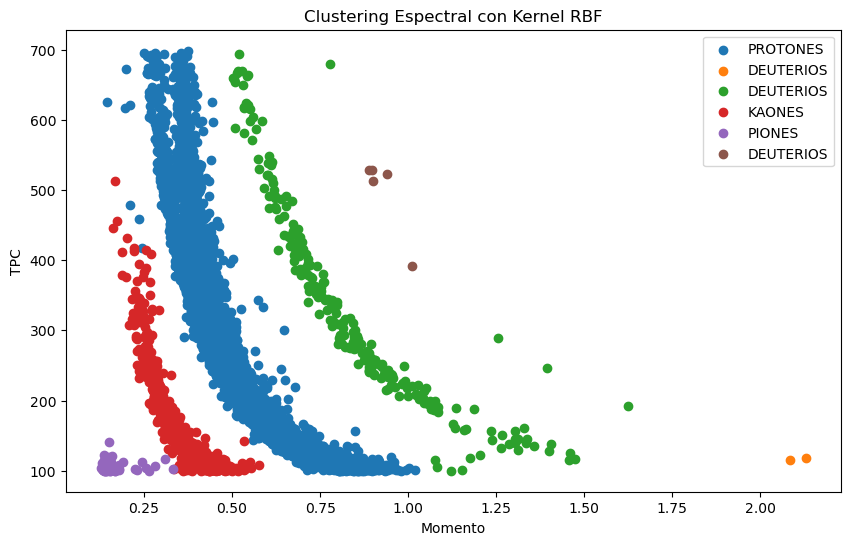

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel

# Load the dataset
data = pd.read_csv('Plomo_pos')

# Filter data in the desired range in the TPC and Momentum columns
filtered_data = data[(data['TPC'] >= 100) & (data['TPC'] <= 700) & (data['Momento'] >= 0) & (data['Momento'] <= 5)]

# Select relevant columns (TPC, Momentum, and ITS) after filtering
X = filtered_data[['Momento', 'TPC', 'ITS']]

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Calculate the affinity matrix with RBF kernel
gamma = 8  # Gamma parameter for the RBF kernel
affinity_matrix = rbf_kernel(X_normalized, gamma=gamma)

# Apply spectral clustering algorithm with RBF affinity
n_clusters = 6  # Number of clusters
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42, assign_labels='discretize')
spectral_clustering.fit(affinity_matrix)
clusters = spectral_clustering.labels_
print("Spectral clustering completed.")

# Calculate cluster centroids manually
cluster_centers = np.array([X[clusters == i].mean(axis=0) for i in range(n_clusters)])

# Print the centroids of each cluster
for i, centroid in enumerate(cluster_centers):
    print(f"Cluster {i}: Centroid coordinates - {centroid}")

# Define the cluster names
cluster_labels = ['PROTONES', 'DEUTERIOS', 'DEUTERIOS', 'KAONES', 'PIONES', 'DEUTERIOS']

# Visualize the data and clusters with labels
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.scatter(X['Momento'][clusters == i], X['TPC'][clusters == i], label=cluster_labels[i], cmap='viridis')
plt.title('Spectral Clustering with RBF Kernel')
plt.xlabel('Momentum')
plt.ylabel('TPC')
plt.legend()
plt.show()



Clustering espectral completado.
Cluster 0: Centroid coordinates - [  0.54969065 246.93542277 289.26871074]
Cluster 1: Centroid coordinates - [  2.106855 116.906    140.8125  ]
Cluster 2: Centroid coordinates - [  0.84591776 337.28647639 398.90075536]
Cluster 3: Centroid coordinates - [  0.37209538 151.00241698 204.52196387]
Cluster 4: Centroid coordinates - [  0.15344792 105.53185577 135.68989423]
Cluster 5: Centroid coordinates - [  0.9275506 496.9       621.4      ]


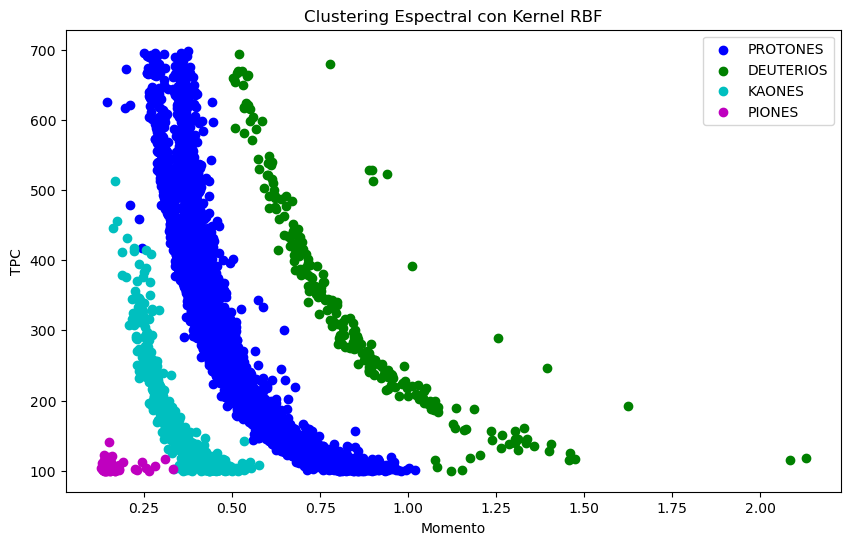

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel

# Load the data set
data = pd.read_csv('Plomo_pos')

# Filter data in the desired range in the TPC and Momentum columns
filtered_data = data[(data['TPC'] >= 100) & (data['TPC'] <= 700) & (data['Momento'] >= 0) & (data['Momento'] <= 5)]

# Select the relevant columns (TPC, Momentum, ITS) after filtering
X = filtered_data[['Momento', 'TPC', 'ITS']]

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Calculate the affinity matrix with RBF kernel
gamma = 8  # Gamma parameter for the RBF kernel
affinity_matrix = rbf_kernel(X_normalized, gamma=gamma)

# Spectral clustering algorithm with RBF affinity
n_clusters = 6  # Desired number of clusters
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42, assign_labels='discretize')
spectral_clustering.fit(affinity_matrix)
clusters = spectral_clustering.labels_
print("Spectral clustering completed.")

# Manually calculate the cluster centroids
cluster_centers = np.array([X[clusters == i].mean(axis=0) for i in range(n_clusters)])

# Print the weights in each class
for i, centroid in enumerate(cluster_centers):
    print(f"Cluster {i}: Centroid coordinates - {centroid}")

# Merge classes 1, 2, and 5 into a single class (DEUTERIOS)
cluster_labels = ['PROTONES', 'DEUTERIOS', 'DEUTERIOS', 'KAONES', 'PIONES', 'DEUTERIOS']
merged_clusters = clusters.copy()
merged_clusters[np.isin(clusters, [1, 2, 5])] = 1

# Visualize the data and clusters with labels
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y']
unique_labels = np.unique(merged_clusters)
for i, label in enumerate(unique_labels):
    label_name = cluster_labels[label]
    plt.scatter(X['Momento'][merged_clusters == label], X['TPC'][merged_clusters == label], c=colors[label], label=label_name)
plt.title('Spectral Clustering with RBF Kernel')
plt.xlabel('Momentum')
plt.ylabel('TPC')
plt.legend()
plt.show()


In [ ]:
Partiuclas Neg 

Clustering espectral completado.
Cluster 0: Coordenadas del centroide - [  2.32471    115.08333333  83.95833333]
Cluster 1: Coordenadas del centroide - [  0.34475223 142.1275336  189.44141759]
Cluster 2: Coordenadas del centroide - [  1.31456    112.45122222 136.57633333]
Cluster 3: Coordenadas del centroide - [  0.65333309 177.27494987 227.07841916]
Cluster 4: Coordenadas del centroide - [nan nan nan]


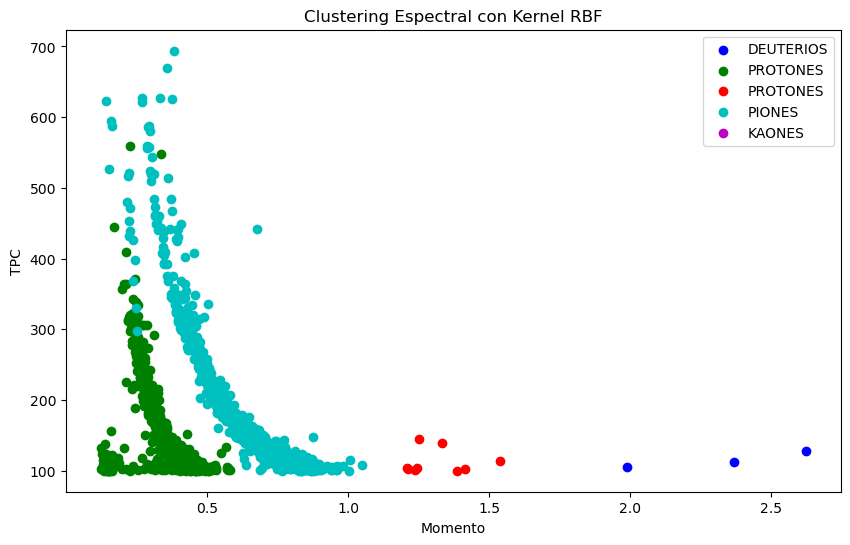

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel

# Load the dataset
data = pd.read_csv('Plomo_neg')

# Filter data in the desired range in the TPC and Momentum columns
filtered_data = data[(data['TPC'] >= 100) & (data['TPC'] <= 700) & (data['Momento'] >= 0) & (data['Momento'] <= 5)]

# Select the relevant columns (TPC, Momentum, ITS) after filtering
X = filtered_data[['Momento', 'TPC', 'ITS']]

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Calculate the affinity matrix with RBF kernel
gamma = 10  # Gamma parameter for the RBF kernel
affinity_matrix = rbf_kernel(X_normalized, gamma=gamma)

# Spectral clustering algorithm with RBF affinity
n_clusters = 5  # Desired number of clusters
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42, assign_labels='discretize')
spectral_clustering.fit(affinity_matrix)
clusters = spectral_clustering.labels_
print("Spectral clustering completed.")

# Manually calculate the cluster centroids
cluster_centers = np.array([X[clusters == i].mean(axis=0) for i in range(n_clusters)])

# Print the centroids of each cluster
for i, centroid in enumerate(cluster_centers):
    print(f"Cluster {i}: Centroid coordinates - {centroid}")

# Add the cluster column to the original DataFrame
data['Cluster'] = np.nan
data.loc[filtered_data.index, 'Cluster'] = clusters

# Save the updated DataFrame to a new CSV file
data.to_csv('Plomo_neg_con_clusters.csv', index=False)

# Define the cluster names
cluster_labels = ['DEUTERIOS', 'PROTONES', 'PROTONES', 'PIONES', 'KAONES', 'PIONES']

# Visualize the data and clusters with labels
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for i in range(n_clusters):
    plt.scatter(X['Momento'][clusters == i], X['TPC'][clusters == i], c=colors[i], label=cluster_labels[i])
plt.title('Spectral Clustering with RBF Kernel')
plt.xlabel('Momentum')
plt.ylabel('TPC')
plt.legend()
plt.show()


Clustering espectral completado.


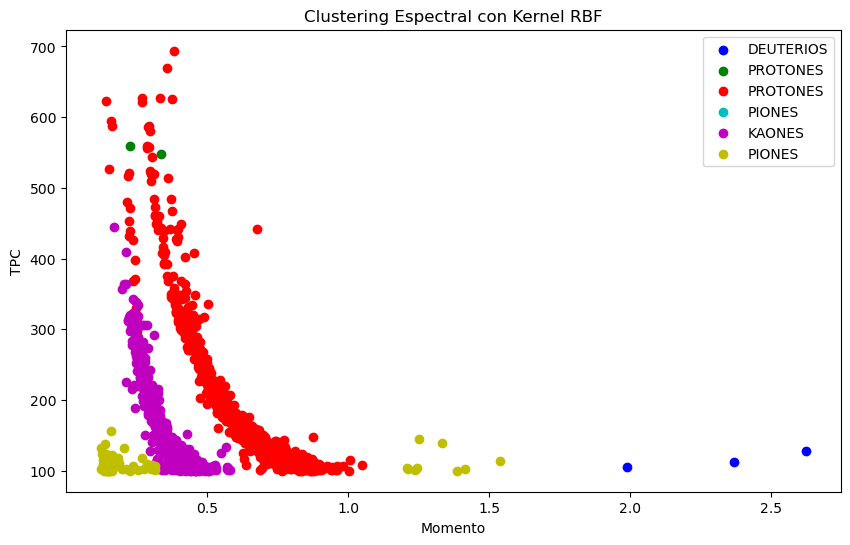

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel

# Load the dataset
data = pd.read_csv('Plomo_neg')

# Filter data in the desired range in the TPC and Momentum columns
filtered_data = data[(data['TPC'] >= 100) & (data['TPC'] <= 700) & (data['Momento'] >= 0) & (data['Momento'] <= 5)]

# Select the relevant columns (TPC, Momentum, ITS) after filtering
X = filtered_data[['Momento', 'TPC', 'ITS']]

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Calculate the affinity matrix with RBF kernel
gamma = 8  # Gamma parameter for the RBF kernel
affinity_matrix = rbf_kernel(X_normalized, gamma=gamma)

# Spectral clustering algorithm with RBF affinity
n_clusters = 6  # Desired number of clusters
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42, assign_labels='discretize')
spectral_clustering.fit(affinity_matrix)
clusters = spectral_clustering.labels_
print("Spectral clustering completed.")

# Add the cluster column to the filtered DataFrame
filtered_data = filtered_data.copy()
filtered_data['Cluster'] = clusters

# Select the desired columns
filtered_data = filtered_data[['Event', 'Particula', 'Px', 'Py', 'Pz', 'Carga', 'Cluster']]

# Save the updated DataFrame to a new CSV file
filtered_data.to_csv('Plomo_neg_con_clases.csv', index=False)

# Define the cluster names (make sure not to duplicate names unless intentional)
cluster_labels = ['DEUTERIOS', 'PROTONES', 'PROTONES', 'PIONES', 'KAONES', 'PIONES']

# Visualize the data and clusters with labels
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for i in range(n_clusters):
    plt.scatter(X['Momento'][clusters == i], X['TPC'][clusters == i], c=colors[i], label=cluster_labels[i])
plt.title('Spectral Clustering with RBF Kernel')
plt.xlabel('Momentum')
plt.ylabel('TPC')
plt.legend()
plt.show()


Clustering espectral completado.


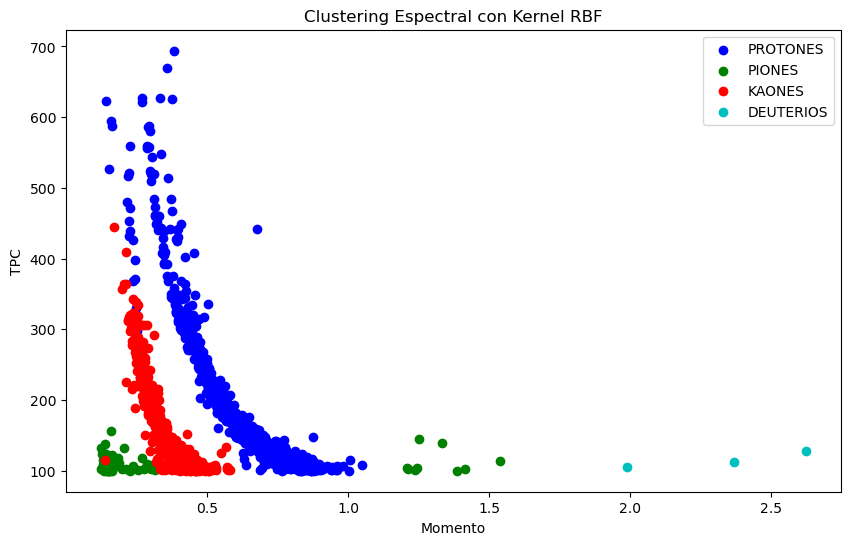

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel

# Load the dataset
data = pd.read_csv('Plomo_neg')

# Filter data in the desired range in the TPC and Momentum columns
filtered_data = data[(data['TPC'] >= 100) & (data['TPC'] <= 700) & (data['Momento'] >= 0) & (data['Momento'] <= 5)]

# Select the relevant columns (TPC, Momentum, ITS) after filtering
X = filtered_data[['Momento', 'TPC', 'ITS']]

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Calculate the affinity matrix with RBF kernel
gamma = 8  # Gamma parameter for the RBF kernel
affinity_matrix = rbf_kernel(X_normalized, gamma=gamma)

# Apply spectral clustering algorithm with RBF affinity
n_clusters = 6  # Desired number of clusters
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42, assign_labels='discretize')
spectral_clustering.fit(affinity_matrix)
clusters = spectral_clustering.labels_
print("Spectral clustering completed.")

# Add the cluster column to the filtered DataFrame
filtered_data = filtered_data.copy()
filtered_data['Cluster'] = clusters

# Select the desired columns
filtered_data = filtered_data[['Event', 'Particula', 'Px', 'Py', 'Pz', 'Carga', 'Cluster']]

# Combine protons into class 0, pions into class 1, kaons into class 2, deuterons into class 3
# Original cluster labels
original_cluster_labels = ['DEUTERIOS', 'PROTONES', 'PROTONES', 'PIONES', 'KAONES', 'PIONES']

# Create a new array for the combined clusters
combined_clusters = clusters.copy()

# Assign new values to the combined clusters
combined_clusters[np.isin(clusters, [1, 2])] = 0  # Protons in class 0
combined_clusters[np.isin(clusters, [3, 5])] = 1  # Pions in class 1
combined_clusters[clusters == 4] = 2  # Kaons in class 2
combined_clusters[clusters == 0] = 3  # Deuterons in class 3

# Reassign cluster names for visualization
unique_labels = np.unique(combined_clusters)
combined_labels = ['PROTONES', 'PIONES', 'KAONES', 'DEUTERIOS']

# Save the updated DataFrame to a new CSV file
filtered_data['Cluster'] = combined_clusters
filtered_data.to_csv('Plomo_neg_con_clases_combinadas.csv', index=False)

# Visualize the data and clusters with labels
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for i, label in enumerate(unique_labels):
    label_name = combined_labels[i]
    plt.scatter(X['Momento'][combined_clusters == label], X['TPC'][combined_clusters == label], c=colors[i], label=label_name)
plt.title('Spectral Clustering with RBF Kernel')
plt.xlabel('Momentum')
plt.ylabel('TPC')
plt.legend()
plt.show()
